# Exploratory Data Analysis 

In [2]:
# Importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Univariate Analysis 

## Loading and Inspecting the Data

In [3]:
df = pd.read_csv('data/used_car_clean.csv', index_col=0)

In [4]:
df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Has_Service_History,Mileage
0,SKODA Fabia,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,0,70189
1,Vauxhall Corsa,1495,88585,2008,4,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,1,88585
2,Hyundai i30,949,137000,2011,3,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,0,137000
3,MINI Hatch,2395,96731,2010,5,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,1,96731
4,Vauxhall Corsa,1000,85000,2013,3,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,0,85000


In [5]:
df.shape

(3597, 14)

The DataFrame has 3597 vehicles listed and 13 features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3597 entries, 0 to 3596
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                3597 non-null   object 
 1   Price                3597 non-null   int64  
 2   Mileage(miles)       3597 non-null   int64  
 3   Registration_Year    3597 non-null   int64  
 4   Previous Owners      3597 non-null   int64  
 5   Fuel type            3597 non-null   object 
 6   Body type            3597 non-null   object 
 7   Engine               3597 non-null   object 
 8   Gearbox              3597 non-null   object 
 9   Doors                3597 non-null   float64
 10  Seats                3597 non-null   float64
 11  Emission Class       3597 non-null   object 
 12  Has_Service_History  3597 non-null   int64  
 13  Mileage              3597 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 421.5+ KB


There are no missing values.

## Summary Statistics 

In [7]:
df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats,Has_Service_History,Mileage
count,3597.000000,3.597000e+03,3597.000000,3597.000000,3597.000000,3597.000000,3597.000000,3.597000e+03
mean,5789.096469,8.152767e+04,2011.928830,2.880178,4.316375,4.898805,0.148457,8.152767e+04
std,4512.535185,3.956656e+04,4.778922,1.222172,0.988246,0.575057,0.355602,3.956656e+04
min,400.000000,1.000000e+00,1992.000000,1.000000,2.000000,2.000000,0.000000,1.000000e+00
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000,0.000000,5.698400e+04
50%,3999.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000,0.000000,8.000000e+04
75%,7999.000000,1.032000e+05,2016.000000,3.000000,5.000000,5.000000,0.000000,1.032000e+05
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000,1.000000,1.110100e+06


- Price average is £5789 there is a large variance but typically ranges between ~ £3,250 and £8,250

- Registration spans between 1992-2023

- Previous owners range between 1-9

## Target Variable Analysis 

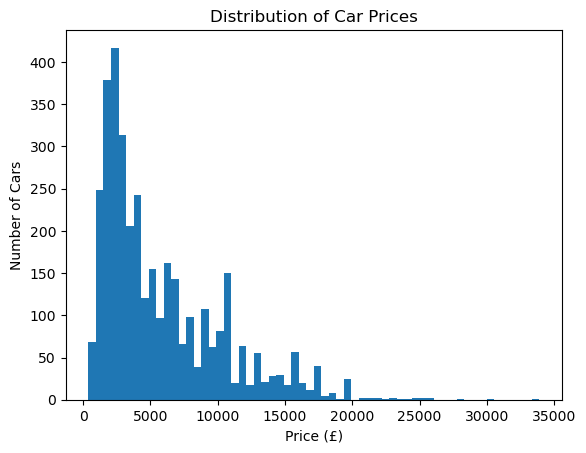

In [8]:
plt.figure()
plt.hist(df['Price'], bins=60)
plt.title("Distribution of Car Prices")
plt.xlabel("Price (£)")
plt.ylabel("Number of Cars")
plt.show()


- Possibly multiple distributions within the data 
- Right skewed 



## Car Age Feature

As car age could be related to price we will add a new feature. This data was collected in 2023 so we will deduct the year bought from 2023 to get the age of the vehicles.

In [9]:
df["Car_Age"] = 2023 - df["Registration_Year"]

## Price vs Age 

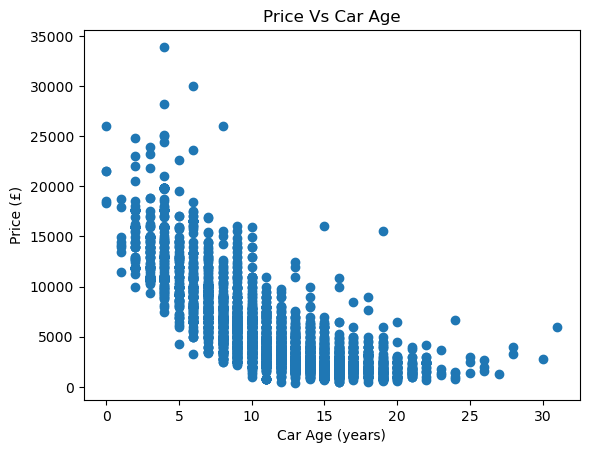

In [10]:
plt.figure()
plt.scatter(df["Car_Age"], df["Price"])
plt.title("Price Vs Car Age")
plt.xlabel("Car Age (years)")
plt.ylabel("Price (£)")
plt.show()

- Negative correlation - the older the car the lower the price 

- As cars reach a certain age price starts to increase again. Most likely related to the vintage quality.

## Price vs Mileage 

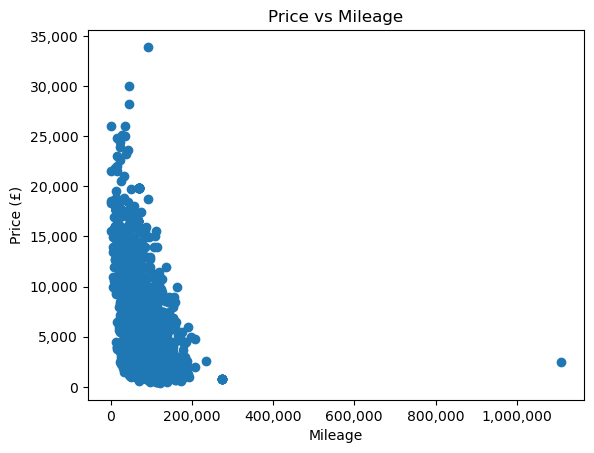

In [11]:
plt.figure()
plt.scatter(df['Mileage(miles)'], df['Price'])
plt.gca().xaxis.set_major_formatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price (£)")
plt.show()

- There is a signficant illogical outlier so we will drop this to better observe.

In [12]:
# Removing the outlier 

df = df[df['Mileage(miles)'] <= 500000]  

df.reset_index(drop=True, inplace=True)

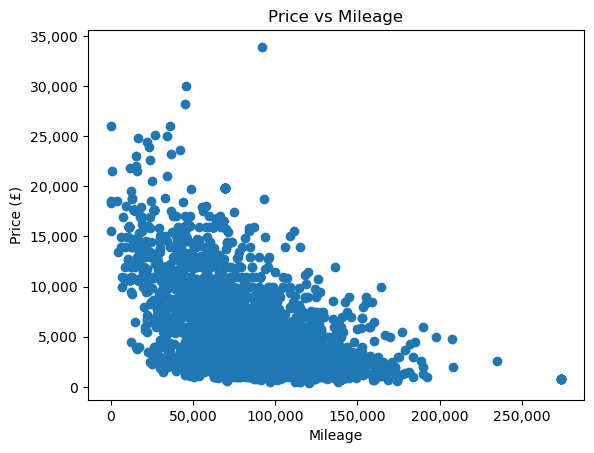

In [13]:
plt.figure()
plt.scatter(df['Mileage(miles)'], df['Price'])
plt.gca().xaxis.set_major_formatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price (£)")
plt.show()

- As mileage increases price decreases

## Engine Analysis 

To analyse the engine data we must convert it to a numeric value as currently it is an object.

In [14]:
# Converting to string and stripping spaces
df['Engine'] = df['Engine'].astype(str).str.strip().str.upper()

# Removing 'L' if present and keeping numeric
df['Engine'] = df['Engine'].str.replace('L','')
df['Engine'] = df['Engine'].str.replace(' ','')  # remove spaces


In [15]:
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')


Separating into bins to establish relationship between price vs age for different engine types.

In [16]:
bins = [0, 1.4, 2.0, 3.0, 7.0]

labels = [
    'Small (≤1.4L)',
    'Medium (1.4–2.0L)',
    'Large (2.0–3.0L)',
    'Performance (3.0L+)'
]

df['Engine_Bin'] = pd.cut(df['Engine'], bins=bins, labels=labels)



In [17]:
df['Engine_Bin'].value_counts()


Engine_Bin
Medium (1.4–2.0L)      1782
Small (≤1.4L)          1483
Large (2.0–3.0L)        290
Performance (3.0L+)      41
Name: count, dtype: int64

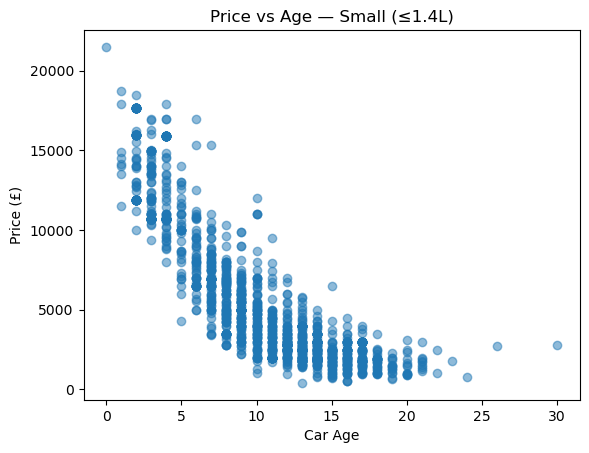

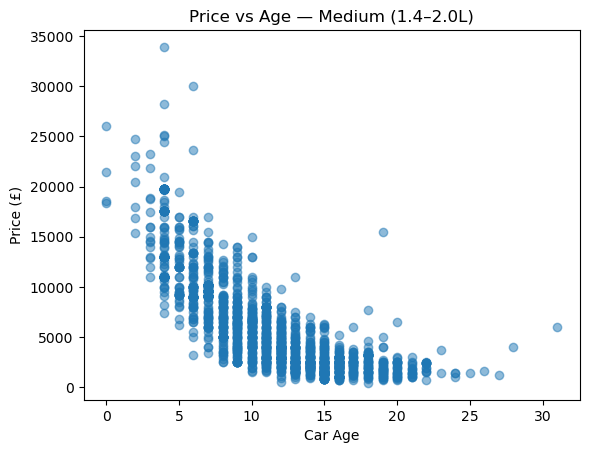

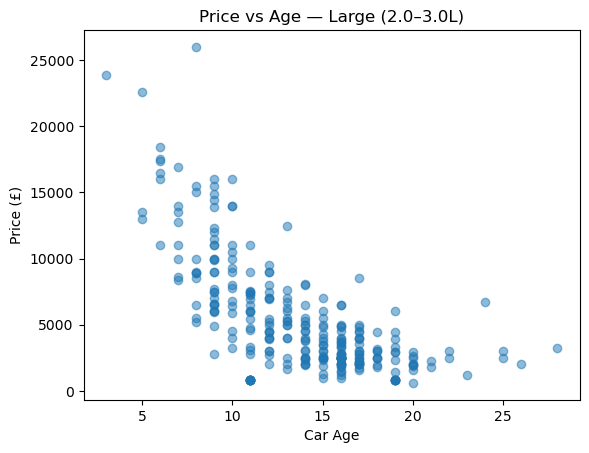

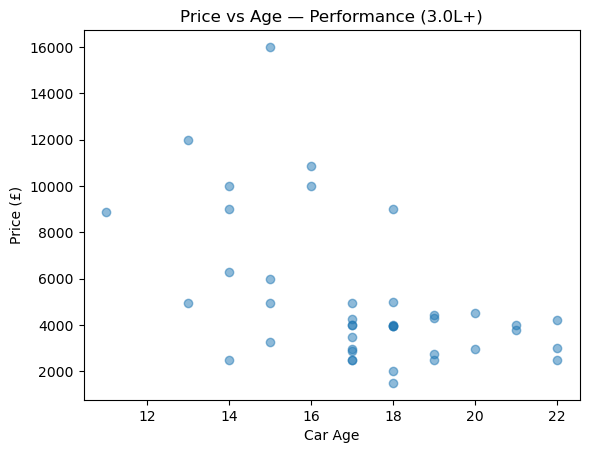

In [18]:
for engine_bin in df['Engine_Bin'].dropna().unique():
    
    subset = df[df['Engine_Bin'] == engine_bin]
    
    plt.figure()
    plt.scatter(subset['Car_Age'], subset['Price'], alpha=0.5)
    
    plt.xlabel("Car Age")
    plt.ylabel("Price (£)")
    plt.title(f"Price vs Age — {engine_bin}")
    
    plt.show()


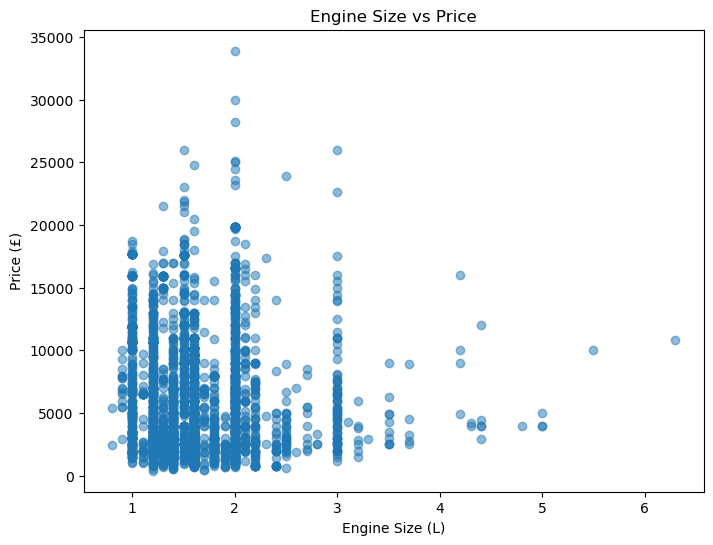

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(df['Engine'], df['Price'], alpha=0.5)

plt.xlabel("Engine Size (L)")
plt.ylabel("Price (£)")
plt.title("Engine Size vs Price")

plt.show()


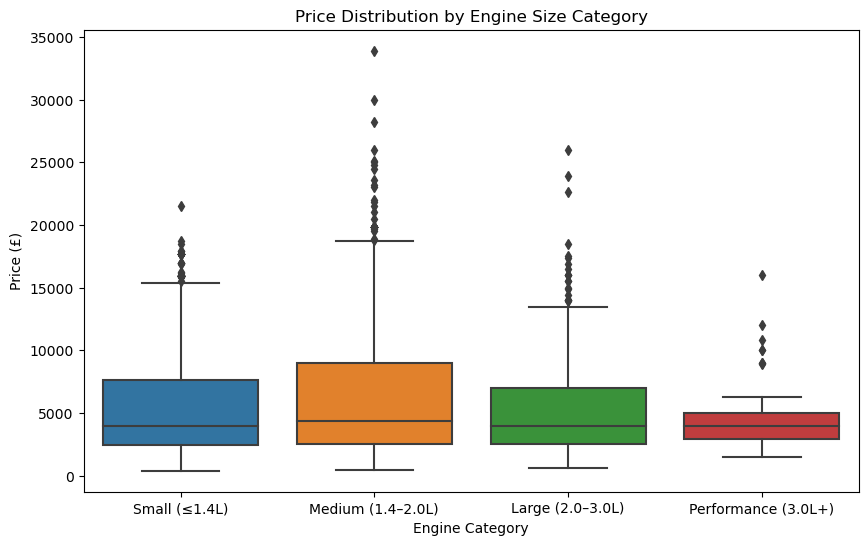

In [20]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Engine_Bin', y='Price', data=df)

plt.xlabel("Engine Category")
plt.ylabel("Price (£)")
plt.title("Price Distribution by Engine Size Category")

plt.show()


In [21]:
df.groupby('Engine_Bin')['Price'].mean().sort_values()


Engine_Bin
Performance (3.0L+)    5084.780488
Large (2.0–3.0L)       5409.917241
Small (≤1.4L)          5578.495617
Medium (1.4–2.0L)      6044.121212
Name: Price, dtype: float64

- No clear correlation between engine size and price

Write conclusioin on univariate analysis here 

In [22]:
df.to_csv("Data/used_car_clean.csv")